In [45]:
import pandas as pd

df = pd.read_csv('CarPrice_Assignment.csv')  # Adjust filename if needed
print(df.head())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [46]:
# Data pre-processing
# Drop unnecessary columns
df = df.drop(['CarName'], axis=1)

# Convert categorical columns
df = pd.get_dummies(df, drop_first=True)

# Check for nulls
print(df.isnull().sum())


car_ID                   0
symboling                0
wheelbase                0
carlength                0
carwidth                 0
carheight                0
curbweight               0
enginesize               0
boreratio                0
stroke                   0
compressionratio         0
horsepower               0
peakrpm                  0
citympg                  0
highwaympg               0
price                    0
fueltype_gas             0
aspiration_turbo         0
doornumber_two           0
carbody_hardtop          0
carbody_hatchback        0
carbody_sedan            0
carbody_wagon            0
drivewheel_fwd           0
drivewheel_rwd           0
enginelocation_rear      0
enginetype_dohcv         0
enginetype_l             0
enginetype_ohc           0
enginetype_ohcf          0
enginetype_ohcv          0
enginetype_rotor         0
cylindernumber_five      0
cylindernumber_four      0
cylindernumber_six       0
cylindernumber_three     0
cylindernumber_twelve    0
c

In [47]:
df.shape

(205, 45)

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top n most correlated features with price
top_n = 12
corr = df.corr()
top_features = corr['price'].abs().nlargest(top_n).index
top_features



Index(['price', 'enginesize', 'curbweight', 'horsepower', 'carwidth',
       'cylindernumber_four', 'highwaympg', 'citympg', 'carlength',
       'drivewheel_rwd', 'drivewheel_fwd', 'wheelbase'],
      dtype='object')

In [49]:
# Create a subset correlation matrix
top_corr_matrix = df[top_features].corr()
top_corr_matrix

,price,enginesize,curbweight,horsepower,carwidth,cylindernumber_four,highwaympg,citympg,carlength,drivewheel_rwd,drivewheel_fwd,wheelbase
price,1.000000,0.874145,0.835305,0.808139,0.759325,-0.697762,-0.697599,-0.685751,0.682920,0.638957,-0.601950,0.577816
enginesize,0.874145,1.000000,0.850594,0.809769,0.735433,-0.631431,-0.677470,-0.653658,0.683360,0.565509,-0.518391,0.569329
curbweight,0.835305,0.850594,1.000000,0.750739,0.867032,-0.576463,-0.797465,-0.757414,0.877728,0.669987,-0.666039,0.776386
horsepower,0.808139,0.809769,0.750739,1.000000,0.640732,-0.639552,-0.770544,-0.801456,0.552623,0.575564,-0.544438,0.353294
carwidth,0.759325,0.735433,0.867032,0.640732,1.000000,-0.523135,-0.677218,-0.642704,0.841118,0.511149,-0.472116,0.795144
cylindernumber_four,-0.697762,-0.631431,-0.576463,-0.639552,-0.523135,1.000000,0.547326,0.541267,-0.400210,-0.434461,0.425481,-0.309492
highwaympg,-0.697599,-0.677470,-0.797465,-0.770544,-0.677218,0.547326,1.000000,0.971337,-0.704662,-0.566149,0.600828,-0.544082
citympg,-0.685751,-0.653658,-0.757414,-0.801456,-0.642704,0.541267,0.971337,1.000000,-0.670909,-0.545789,0.563879,-0.470414
carlength,0.682920,0.683360,0.877728,0.552623,0.841118,-0.400210,-0.704662,-0.670909,1.000000,0.538370,-0.508714,0.874587
drivewheel_rwd,0.638957,0.565509,0.669987,0.575564,0.511149,-0.434461,-0.566149,-0.545789,0.538370,1.000000,-0.911996,0.498830


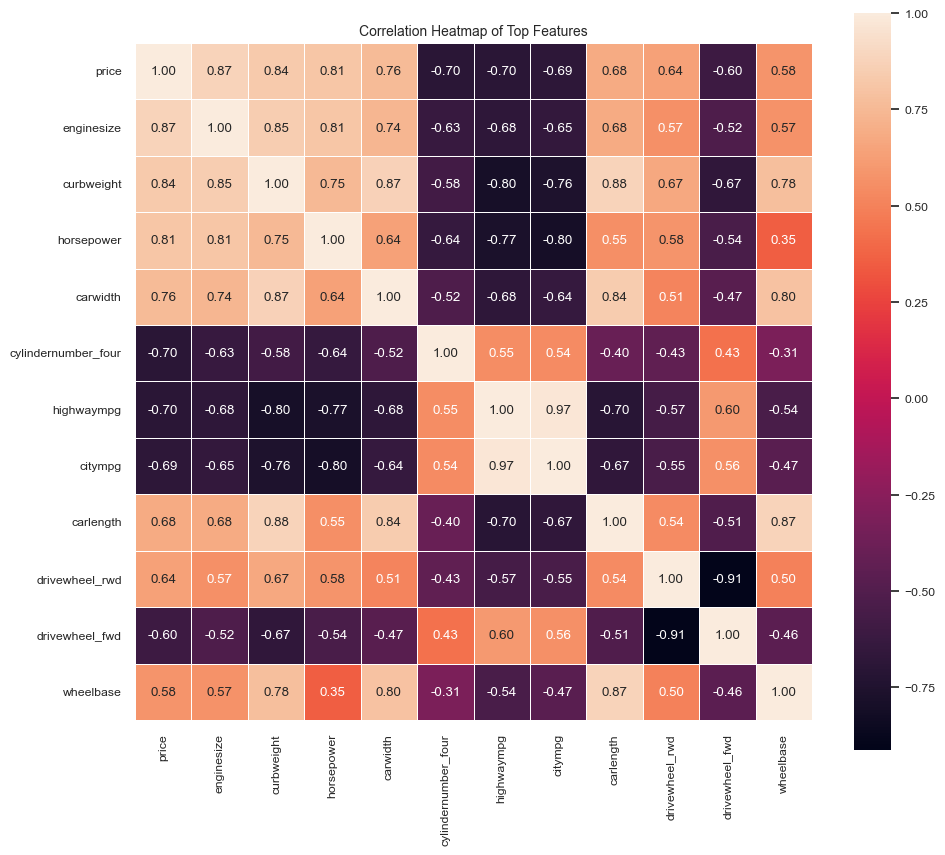

In [50]:
# Set figure size and styling
from turtle import color


plt.figure(figsize=(10, 10))
sns.set_theme(font_scale=0.8)
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", linewidths=0.5, square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap of Top Features', fontsize=10)
plt.tight_layout()
plt.show()

In [51]:
#Prepare for modeling
X = df[top_features]
X = X.drop('price', axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")


R² Score: 0.868


In [53]:
lr.score(X_test, y_test)

0.8675760320018387